In [212]:
# imports
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread,imsave
#import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import binary_dilation,binary_erosion
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import filters
import math
%matplotlib inline

In [213]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

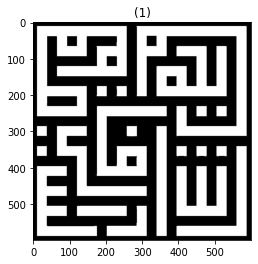

shape  (599, 600)


In [214]:
# read imahe and convert to Grey scale
#img = imread("./ACDB/ACdata_base/9/1496.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/1/0001.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/2/0191.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/3/0381.jpG", as_gray=True)
#img = imread("./ACDB/ACdata_base/4/0561.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/5/746.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/6/0941.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/7/1121.jpg", as_gray=True)
#img = imread("./ACDB/ACdata_base/8/1306.jpg", as_gray=True)
img = imread("./ACDB/ACdata_base/9/1496.jpg", as_gray=True)
img = img.astype(np.float64) / np.max(img)
img = 255 * img
img = img.astype(np.uint8)
show_images([img])
print("shape ",img.shape)

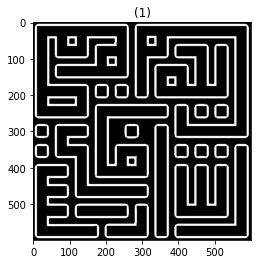

In [215]:
# binarization => this is the who;e text image 
t = sk.filters.threshold_local(img, 21, offset=10)
img = img < t
show_images([img])

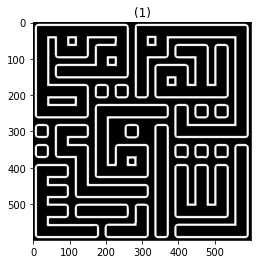

In [216]:
# remove noise 
img = binary_dilation(img)
img = binary_erosion(img)
show_images([img])

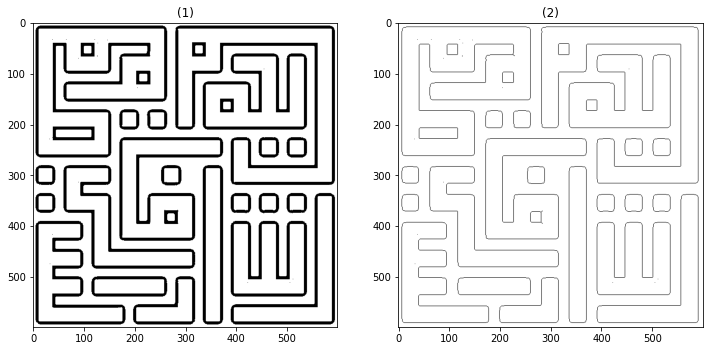

In [217]:
thin = sk.morphology.skeletonize(img)
thin = thin*1
thin = thin == 0
thin = thin*1
img = img == 0
show_images([img,thin])

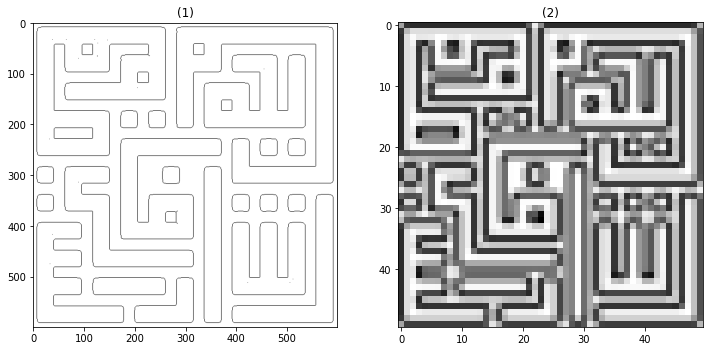

In [218]:
# add sobel filter and resize image
image_rescaled = resize(thin, (50,50),
                       anti_aliasing=True)

show_images([thin,image_rescaled])

In [220]:
sy = filters.sobel_h(img)+0.0000000000000000000000000000000000001
sx = filters.sobel_v(img)+0.0000000000000000000000000000000000001
#print(sy,sx)
z = np.rad2deg(np.arctan(sy/sx))
z = z.astype(int)
hist = sk.exposure.histogram(z)
arr = [] 
for i in range(len(hist[0])):
    arr.append((hist[0][i]/(img.shape[0]*img.shape[1]),hist[1][i]))
#arr = np.sort(arr)
arr.sort()
#arr = np.flip(arr)
arr = arr[::-1]
# for i in range(5):
#     print(arr[i])


(0.8526321647189761, 45)
(0.06802726766833611, 0)
(0.03357262103505843, 90)
(0.033249860879243184, -90)
(0.004307178631051753, -45)
